In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/heart.csv"

response = requests.get(url)

data = StringIO(response.text)
df = pd.read_csv(data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [214]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [216]:
X = df.drop('target', axis=1)
Y = df['target']

In [218]:
Y = pd.get_dummies(Y).values  # y를 원핫 인코딩

X = X.values  #넘파이

In [220]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 20% 만
X_train.shape, X_test.shape

((242, 13), (61, 13))

In [222]:
model = Sequential()
model.add(Dense(64, input_shape=(13,), activation='relu'))  # 첫 은닉층
model.add(Dense(32, activation='relu'))                     # 두 번째 은닉층
model.add(Dense(2, activation='softmax'))                   # 출력층 (이진 분류)

model.summary()

C:\Users\chelego\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,042 (11.88 KB)

 Trainable params: 3,042 (11.88 KB)

 Non-trainable params: 0 (0.00 B)

In [224]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [226]:
model_history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_test, Y_test))

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4601 - loss: 26.1248 - val_accuracy: 0.6230 - val_loss: 0.7783
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5888 - loss: 3.4853 - val_accuracy: 0.5574 - val_loss: 4.9995
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5458 - loss: 3.5930 - val_accuracy: 0.5082 - val_loss: 2.6986
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5169 - loss: 2.4333 - val_accuracy: 0.6066 - val_loss: 1.3542
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6361 - loss: 1.4252 - val_accuracy: 0.6066 - val_loss: 0.8720
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6519 - loss: 1.2928 - val_accuracy: 0.6885 - val_loss: 0.8591
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6054 - loss: 0.9615 - val_accuracy: 0.6230 - val_loss: 0.7326
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6241 - loss: 0.8110 - val_accuracy: 0.7049 - val_loss: 0.6431

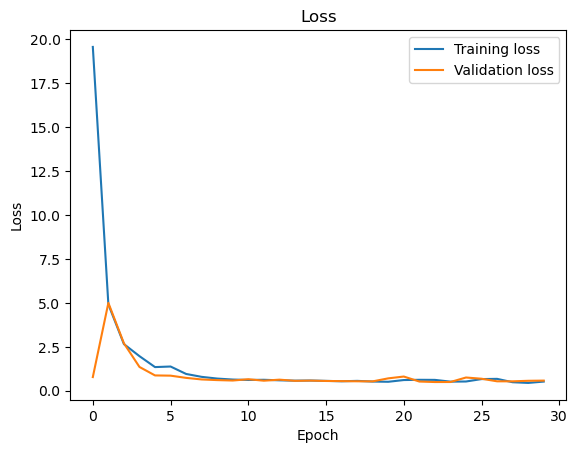

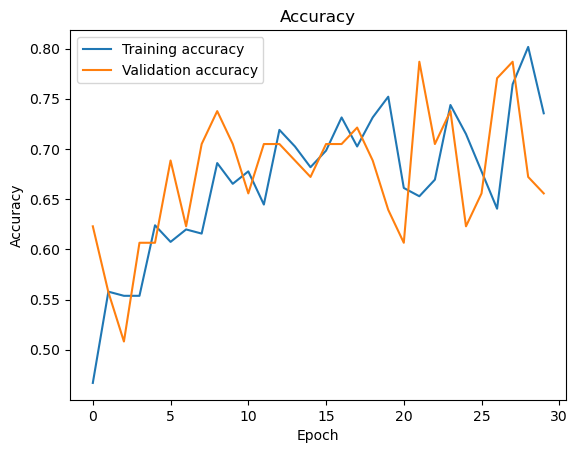

In [227]:
#Loss graph
plt.plot(model_history.history['loss'], label='Training loss')
plt.plot(model_history.history['val_loss'], label='Validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Loss graph
plt.plot(model_history.history['accuracy'], label='Training accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [198]:
Y_pred = model.predict(X_test)

Y_test_class = np.argmax(Y_test, axis=1)

Y_pred_class = np.argmax(Y_pred, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [200]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(Y_test_class, Y_pred_class))
print(confusion_matrix(Y_test_class, Y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        27
           1       0.78      0.91      0.84        34

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.79        61
weighted avg       0.81      0.80      0.80        61

[[18  9]
 [ 3 31]]
